In [1]:
import os
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
true_r1, true_phi1, true_z1 = [], [], []
reco_r1, reco_phi1, reco_z1 = [], [], []
true_r2, true_phi2, true_z2 = [], [], []
reco_r2, reco_phi2, reco_z2 = [], [], []
events = []
sns_response1, sns_response2 = [],[]
true_t1, true_t2 = [], []
sipm_t1, sipm_t2         = [[] for i in range(4)], [[] for i in range(4)]
first_sipm1, first_sipm2 = [[] for i in range(4)], [[] for i in range(4)]
phot1, phot2, phot_like1, phot_like2 = [], [], [], []
true_dep_e1, true_dep_e2 = [], []

#filepath = '/data5/users/carmenromo/fastmc/data_extract_true_reco_info_full_body_exp_dist_tof/data_coincidences_phot_info_dist_tof_dif_thr_charge/'
filepath = '/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/data_extract_coinc_phantom//'

list_coinc = []
for filename in os.listdir(filepath):
    if filename.endswith('.npz'):
        my_file = filepath+filename
        d   = np.load(my_file)
            
        true_r1   = np.concatenate((true_r1,   d['a_true_r1']))
        true_phi1 = np.concatenate((true_phi1, d['a_true_phi1']))
        true_z1   = np.concatenate((true_z1,   d['a_true_z1']))   
            
        reco_r1   = np.concatenate((reco_r1,   d['a_reco_r1']))
        reco_phi1 = np.concatenate((reco_phi1, d['a_reco_phi1']))  
        reco_z1   = np.concatenate((reco_z1,   d['a_reco_z1']))  
        
        true_r2   = np.concatenate((true_r2,   d['a_true_r2']))
        true_phi2 = np.concatenate((true_phi2, d['a_true_phi2']))
        true_z2   = np.concatenate((true_z2,   d['a_true_z2']))   
            
        reco_r2   = np.concatenate((reco_r2,   d['a_reco_r2']))
        reco_phi2 = np.concatenate((reco_phi2, d['a_reco_phi2']))  
        reco_z2   = np.concatenate((reco_z2,   d['a_reco_z2']))  
        
        true_t1 = np.concatenate((true_t1, d['a_true_time1']))
        true_t2 = np.concatenate((true_t2, d['a_true_time2']))
        
        
        sns_response1 = np.concatenate((sns_response1, d['a_sns_response1']))
        sns_response2 = np.concatenate((sns_response2, d['a_sns_response2']))
        
        phot1       = np.concatenate((phot1, d['a_photo1']))
        phot2       = np.concatenate((phot2, d['a_photo2']))
        phot_like1  = np.concatenate((phot_like1, d['a_photo_like1']))
        phot_like2  = np.concatenate((phot_like2, d['a_photo_like2']))
        true_dep_e1 = np.concatenate((true_dep_e1, d['a_hit_energy1']))
        true_dep_e2 = np.concatenate((true_dep_e2, d['a_hit_energy2']))
        
        events = np.concatenate((events, d['a_event_ids']))
        
        for i in range(4):
            sipm_t1[i] = np.concatenate((sipm_t1[i], d[f'a_first_time1_thr{i}']))
            sipm_t2[i] = np.concatenate((sipm_t2[i], d[f'a_first_time2_thr{i}']))
            
            first_sipm1[i] = np.concatenate((first_sipm1[i], d[f'a_first_sipm1_thr{i}']))
            first_sipm2[i] = np.concatenate((first_sipm2[i], d[f'a_first_sipm2_thr{i}']))


        
true_r1   = np.array(true_r1)
true_phi1 = np.array(true_phi1)
true_z1   = np.array(true_z1)

reco_r1   = np.array(reco_r1)
reco_phi1 = np.array(reco_phi1)
reco_z1   = np.array(reco_z1)

true_r2   = np.array(true_r2)
true_phi2 = np.array(true_phi2)
true_z2   = np.array(true_z2)

reco_r2   = np.array(reco_r2)
reco_phi2 = np.array(reco_phi2)
reco_z2   = np.array(reco_z2)

true_t1 = np.array(true_t1) 
sipm_t1 = np.array(sipm_t1)
true_t2 = np.array(true_t2)
sipm_t2 = np.array(sipm_t2)
first_sipm1 = np.array(first_sipm1)
first_sipm2 = np.array(first_sipm2)

sns_response1 = np.array(sns_response1)
sns_response2 = np.array(sns_response2)

phot1 = np.array(phot1)
phot2 = np.array(phot2)
phot_like1 = np.array(phot_like1)
phot_like2 = np.array(phot_like2)
true_dep_e1 = np.array(true_dep_e1)
true_dep_e2 = np.array(true_dep_e2)

events = np.array(events)

true_x1 = true_r1 * np.cos(true_phi1)
reco_x1 = reco_r1 * np.cos(reco_phi1)
true_y1 = true_r1 * np.sin(true_phi1)
reco_y1 = reco_r1 * np.sin(reco_phi1)
true_x2 = true_r2 * np.cos(true_phi2)
reco_x2 = reco_r2 * np.cos(reco_phi2)
true_y2 = true_r2 * np.sin(true_phi2)
reco_y2 = reco_r2 * np.sin(reco_phi2)

In [3]:
len(true_x1)

1202735

In [4]:
true_x = np.concatenate((true_x1, true_x2), axis=0)
true_y = np.concatenate((true_y1, true_y2), axis=0)
reco_x = np.concatenate((reco_x1, reco_x2), axis=0)
reco_y = np.concatenate((reco_y1, reco_y2), axis=0)

true_z = np.concatenate((true_z1, true_z2), axis=0)
reco_z = np.concatenate((reco_z1, reco_z2), axis=0)

true_r = np.concatenate((true_r1, true_r2), axis=0)
reco_r = np.concatenate((reco_r1, reco_r2), axis=0)

true_phi = np.concatenate((true_phi1, true_phi2), axis=0)
reco_phi = np.concatenate((reco_phi1, reco_phi2), axis=0)

diff_x   = reco_x   - true_x
diff_y   = reco_y   - true_y
diff_r   = reco_r   - true_r
diff_phi = reco_phi - true_phi
diff_z   = reco_z   - true_z

Text(0, 0.5, 'Reco y')

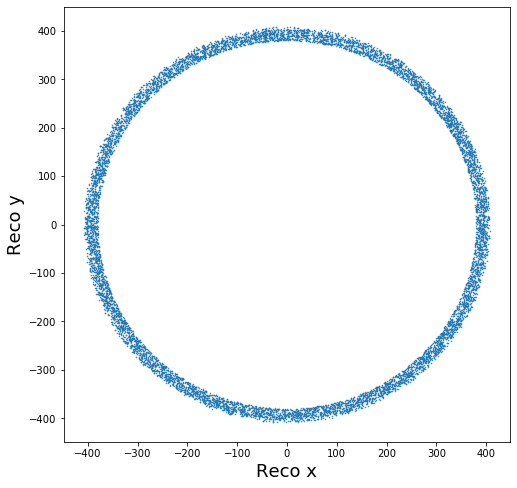

In [5]:
plt.figure(figsize=(8,8))
plt.plot(reco_x[:10000], reco_y[:10000], '.', markersize=1)
#plt.plot(true_x[:4000], true_y[:4000], '.', markersize=1)
plt.xlabel('Reco x', size=18)
plt.ylabel('Reco y', size=18)

Text(0, 0.5, 'Reco z')

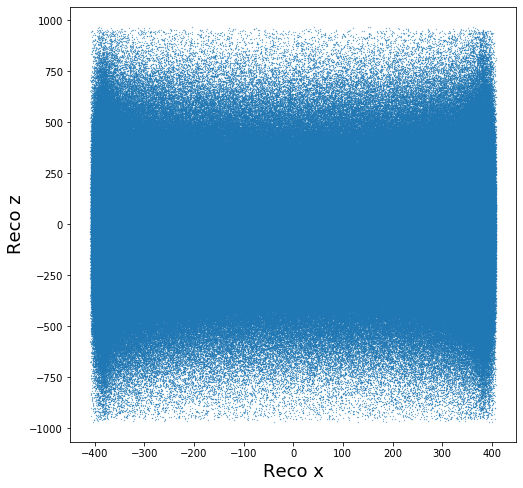

In [6]:
plt.figure(figsize=(8,8))
plt.plot(reco_x, reco_z, '.', markersize=0.5)
plt.xlabel('Reco x', size=18)
plt.ylabel('Reco z', size=18)

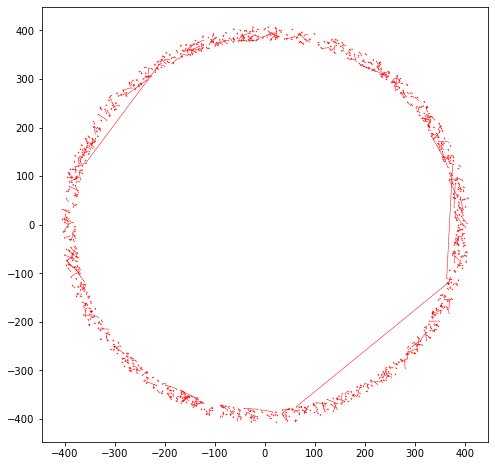

In [8]:
plt.figure(figsize=(8,8))
for (tx1, ty1, rx1, ry1) in zip(true_x1[5000:6000], true_y1[5000:6000], reco_x1[5000:6000], reco_y1[5000:6000]):
    xs = np.array([tx1, rx1])
    ys = np.array([ty1, ry1])
    dist = np.sqrt((tx1-rx1)**2 + (ty1-ry1)**2)
    plt.plot(xs, ys, '.', markersize=0.5, linestyle='-', linewidth=0.5, c='r')

Text(0, 0.5, 'Reco y')

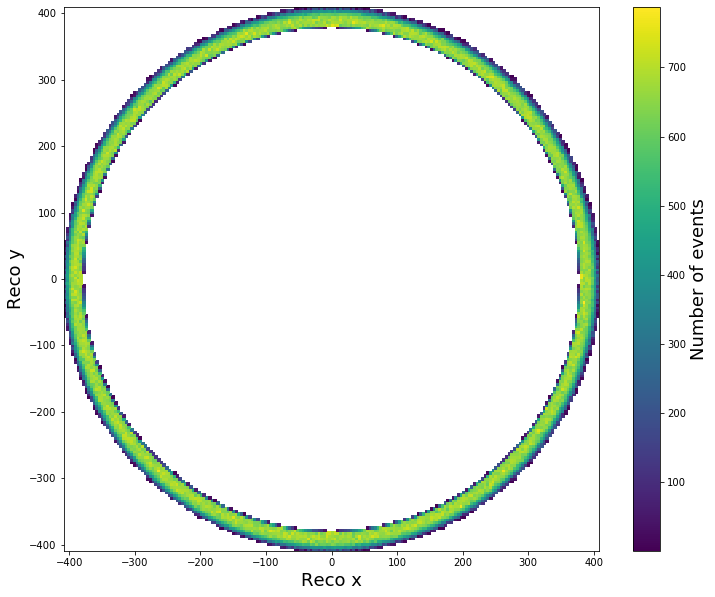

In [9]:
xbins  = 200
ybins  = 200

plt.figure(figsize=(12, 10))
nevt, *_ = plt.hist2d(reco_x, reco_y, (xbins, ybins), cmin=1)
plt.colorbar().set_label("Number of events", size=18)
plt.xlabel('Reco x', size=18)
plt.ylabel('Reco y', size=18)

Text(0, 0.5, 'Reco z')

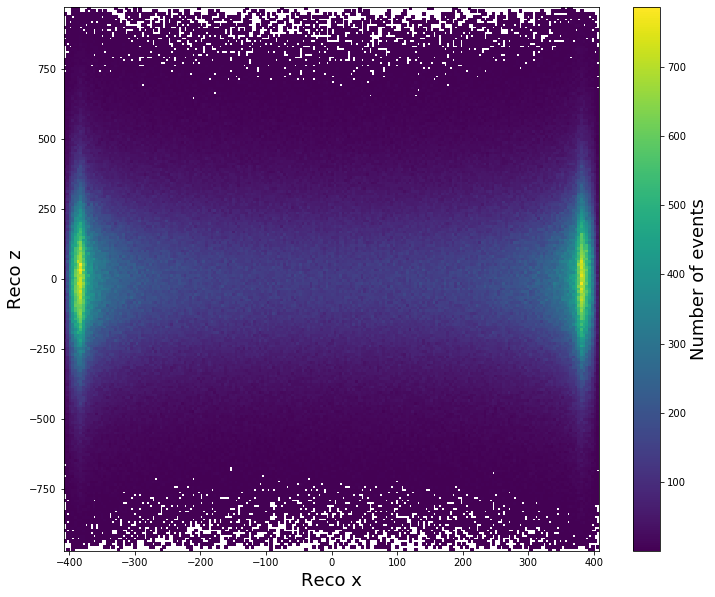

In [10]:
xbins  = 200
ybins  = 200

plt.figure(figsize=(12, 10))
nevt, *_ = plt.hist2d(reco_x, reco_z, (xbins, ybins), cmin=1)
plt.colorbar().set_label("Number of events", size=18)
plt.xlabel('Reco x', size=18)
plt.ylabel('Reco z', size=18)

Text(0, 0.5, 'Reco z')

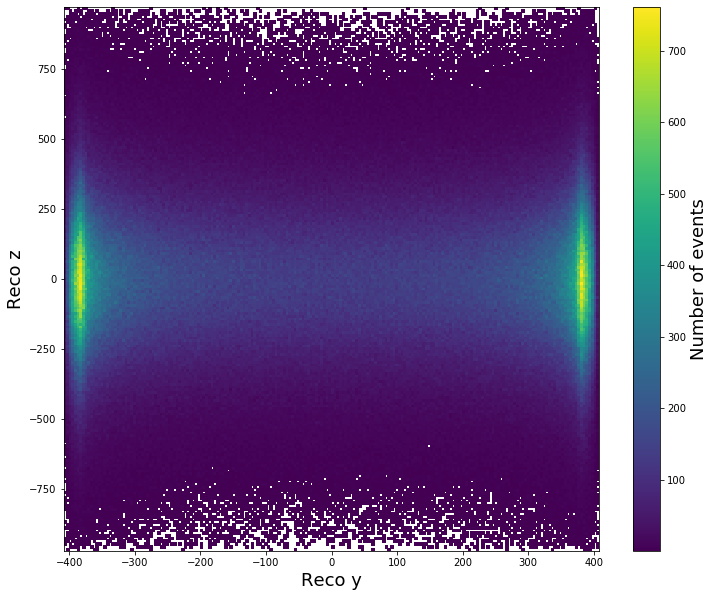

In [11]:
xbins  = 200
ybins  = 200

plt.figure(figsize=(12, 10))
nevt, *_ = plt.hist2d(reco_y, reco_z, (xbins, ybins), cmin=1)
plt.colorbar().set_label("Number of events", size=18)
plt.xlabel('Reco y', size=18)
plt.ylabel('Reco z', size=18)

In [12]:
sns_response1

array([1219., 1187., 1133., ..., 1030., 1203., 1195.])

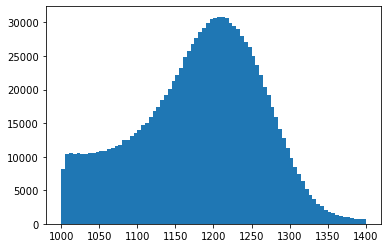

In [13]:
plt.hist(sns_response1, 80, (1000, 1400));

### Analize phot like

In [14]:
phot      = np.concatenate((phot1     .astype(int),      phot2.astype(int)), axis=0)
phot_like = np.concatenate((phot_like1.astype(int), phot_like2.astype(int)), axis=0)
print(phot)

true_x_phot = np.concatenate((true_x1, true_x2), axis=0)[phot]
true_y_phot = np.concatenate((true_y1, true_y2), axis=0)[phot]
reco_x_phot = np.concatenate((reco_x1, reco_x2), axis=0)[phot]
reco_y_phot = np.concatenate((reco_y1, reco_y2), axis=0)[phot]
true_z_phot = np.concatenate((true_z1, true_z2), axis=0)[phot]
reco_z_phot = np.concatenate((reco_z1, reco_z2), axis=0)[phot]

true_x_phot_like = np.concatenate((true_x1, true_x2), axis=0)[phot_like]
true_y_phot_like = np.concatenate((true_y1, true_y2), axis=0)[phot_like]
reco_x_phot_like = np.concatenate((reco_x1, reco_x2), axis=0)[phot_like]
reco_y_phot_like = np.concatenate((reco_y1, reco_y2), axis=0)[phot_like]
true_z_phot_like = np.concatenate((true_z1, true_z2), axis=0)[phot_like]
reco_z_phot_like = np.concatenate((reco_z1, reco_z2), axis=0)[phot_like]

[0 0 0 ... 0 0 0]


(360, 410)

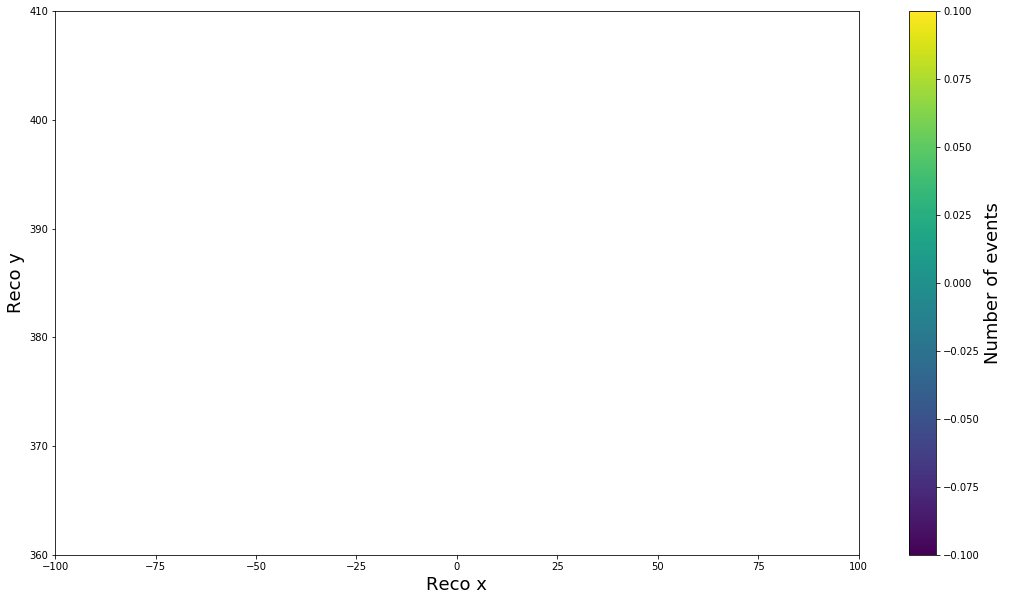

In [14]:
xbins  = 40
ybins  = 15

lim_x = -100, 100
lim_y =  350, 410
sel_x = (reco_x_phot > lim_x[0]) & (reco_x_phot < lim_x[1])
sel_y = (reco_y_phot > lim_y[0]) & (reco_y_phot < lim_y[1])
plt.figure(figsize=(18, 10))
nevt, *_ = plt.hist2d(reco_x_phot[sel_x & sel_y], reco_y_phot[sel_x & sel_y], (xbins, ybins), cmin=1)
plt.colorbar().set_label("Number of events", size=18)
plt.xlabel('Reco x', size=18)
plt.ylabel('Reco y', size=18)
plt.xlim(-100,100)
plt.ylim(360,410)

In [20]:
Nevt = {}
i    = 1
for nZ, nR in zip(Znbins, Rnbins):
    zbins  = Zbins [nZ]
    rbins  = Rbins [nR]
    zpitch = Zpitch[nZ]
    rpitch = Rpitch[nR]
    
    plt.subplot(3, 2, i)
    nevt, *_ = plt.hist2d(Z, R, (nZ, nR))
    plt.colorbar().set_label("Number of events")
    labels("Z (mm)", "R (mm)", f"Event distribution for {zpitch:.1f} and {rpitch:.1f} mm pitch")

    Nevt[(nZ, nR)]  = nevt
    i       += 1

plt.tight_layout()
#save("Event_distribution_different_pitches_ZR_" + added_string)

NameError: name 'Znbins' is not defined

Text(0, 0.5, 'Reco r')

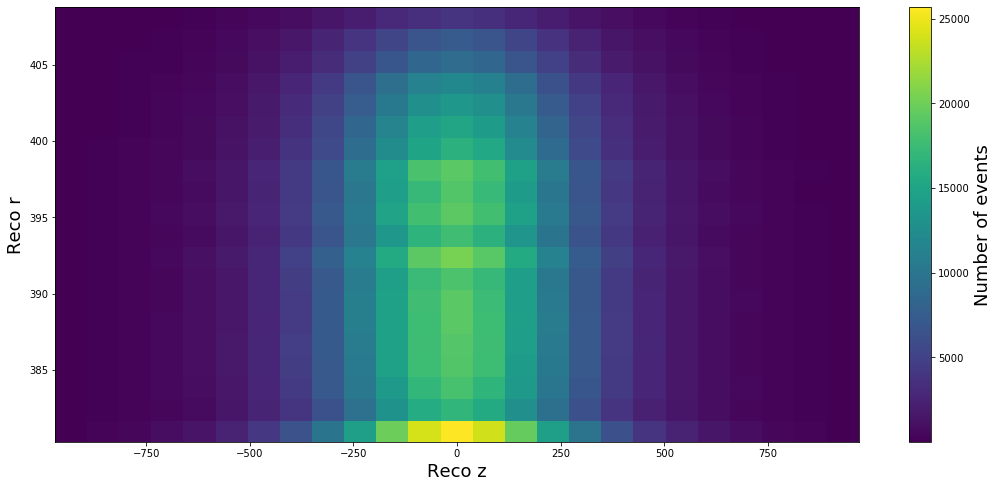

In [15]:
xbins  = 25
ybins  = 20

plt.figure(figsize=(18, 8))
nevt, *_ = plt.hist2d(reco_z, reco_r, (xbins, ybins), cmin=1)
plt.colorbar().set_label("Number of events", size=18)
plt.xlabel('Reco z', size=18)
plt.ylabel('Reco r', size=18)

Text(0.5, 1.0, 'R')

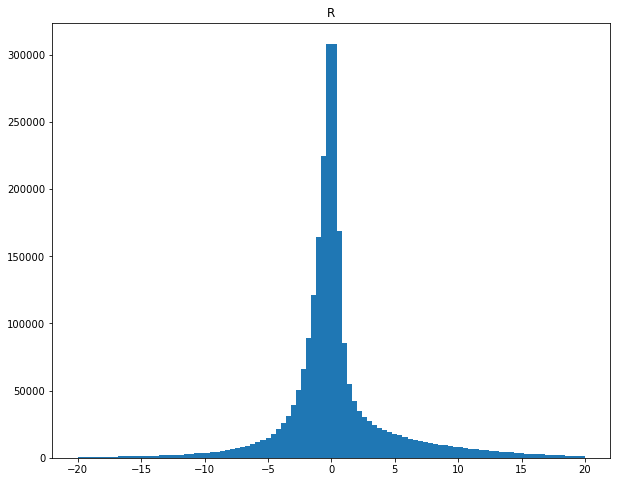

In [16]:
plt.figure(figsize=(10,8))
plt.hist(diff_r, 100, (-20, 20));
plt.title('R')

Text(0.5, 1.0, 'Phi')

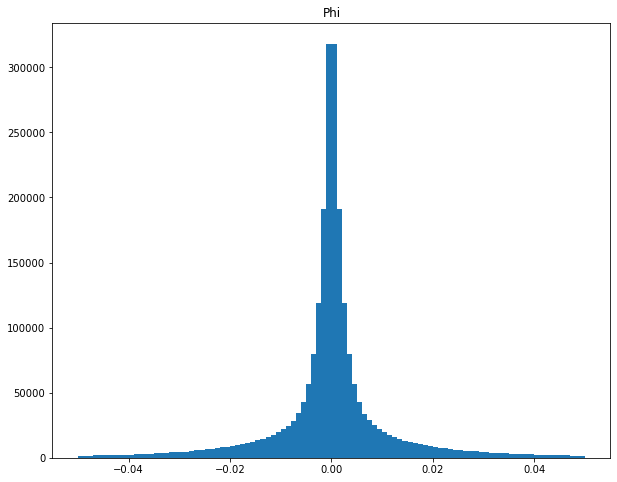

In [17]:
plt.figure(figsize=(10,8))
plt.hist(diff_phi, 100, (-0.05, 0.05));
plt.title('Phi')

Text(0.5, 1.0, 'Z')

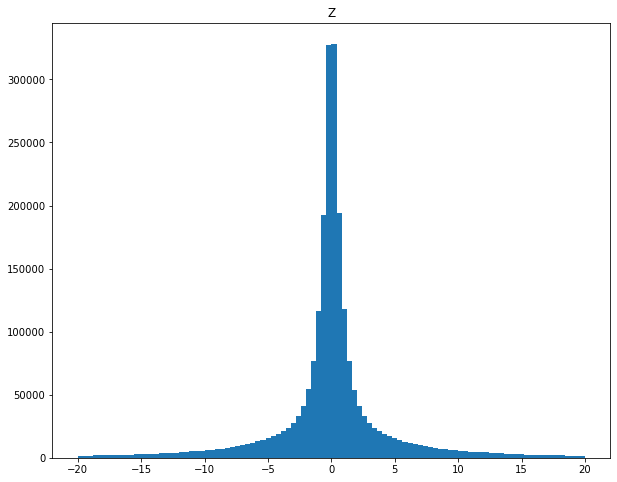

In [18]:
plt.figure(figsize=(10,8))
plt.hist(diff_z, 100, (-20, 20));
plt.title('Z')

Text(0.5, 1.0, 'X')

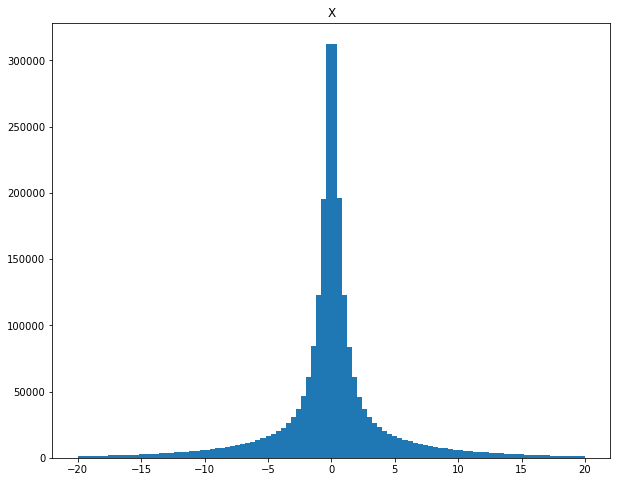

In [19]:
plt.figure(figsize=(10,8))
plt.hist(diff_x, 100, (-20, 20));
plt.title('X')

Text(0.5, 1.0, 'Y')

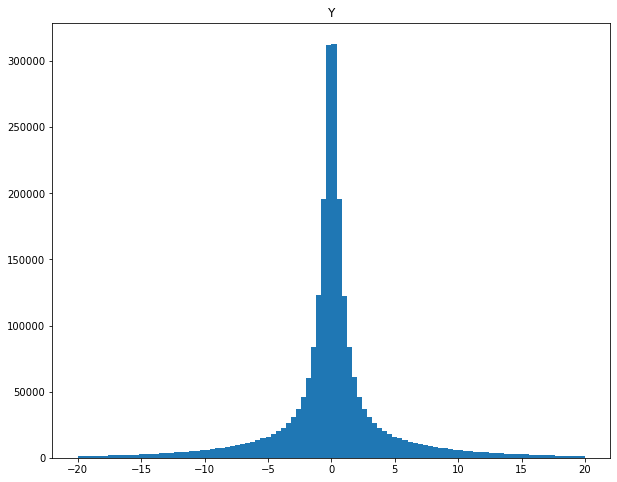

In [20]:
plt.figure(figsize=(10,8))
plt.hist(diff_y, 100, (-20, 20));
plt.title('Y')